<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
0
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


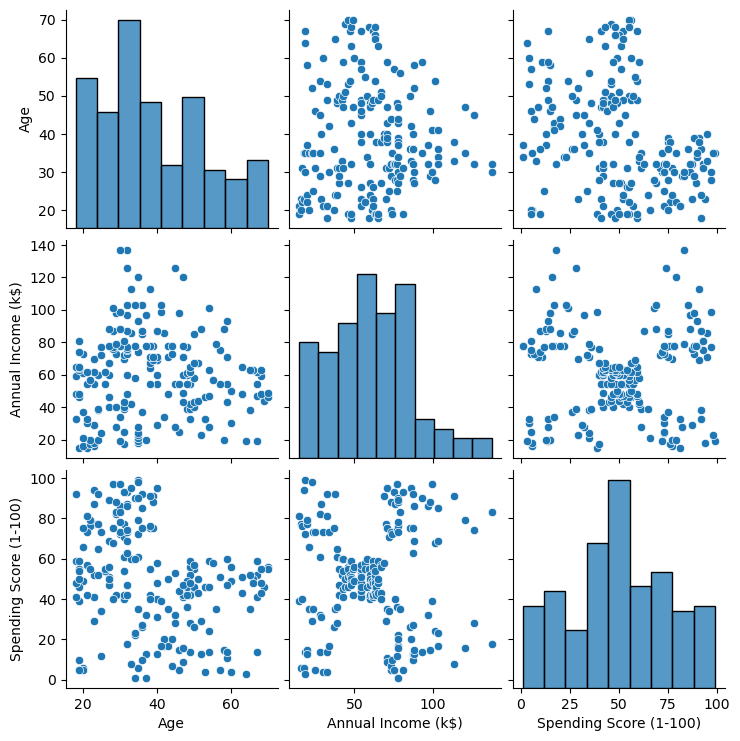

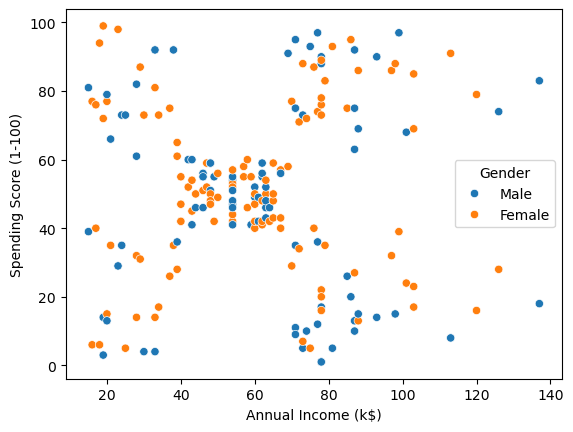

C:\Users\Leguizamo Gonzalez\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Leguizamo Gonzalez\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Leguizamo Gonzalez\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Leguizamo Gonzalez\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarn

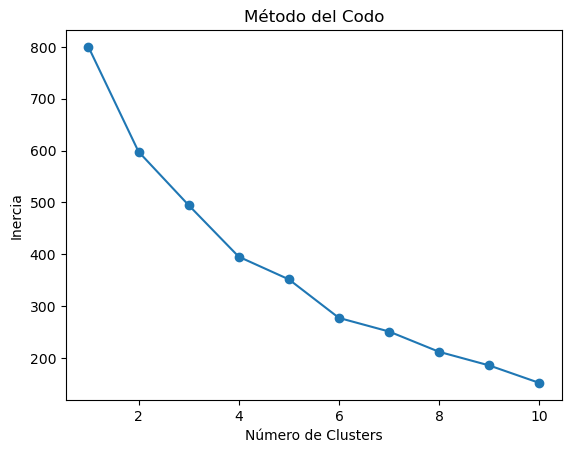

C:\Users\Leguizamo Gonzalez\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


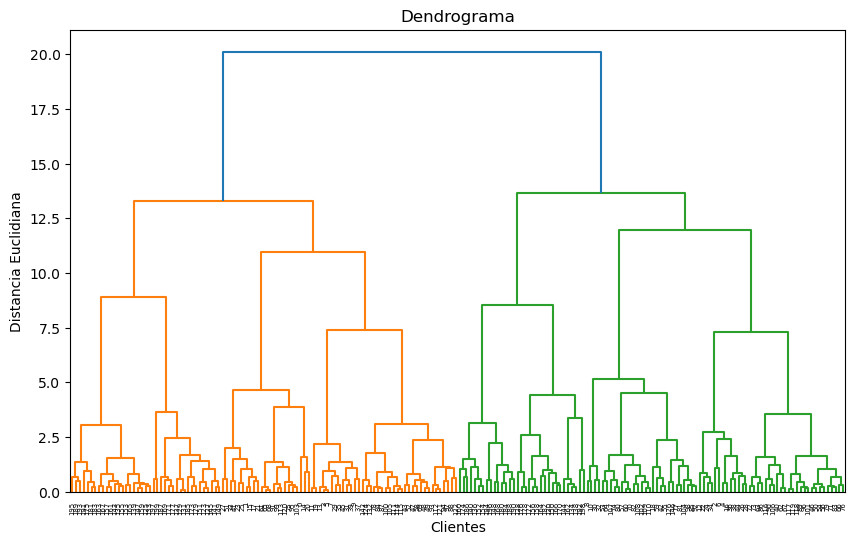

KMeans - Silhouette: 0.27191023466188324
KMeans - Calinski-Harabasz: 62.12634193286723
Hierarchical - Silhouette: 0.28699413201651747
Hierarchical - Calinski-Harabasz: 64.46870730105833


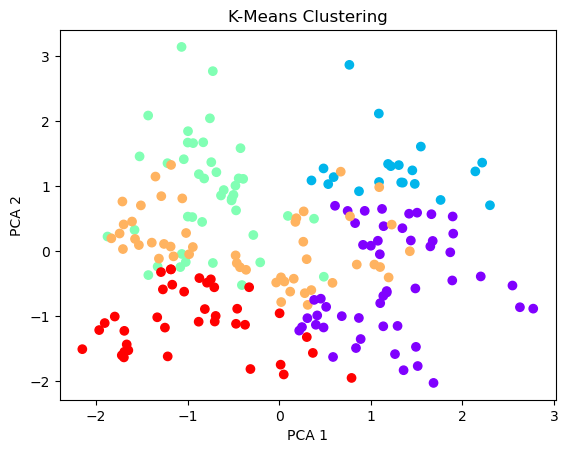

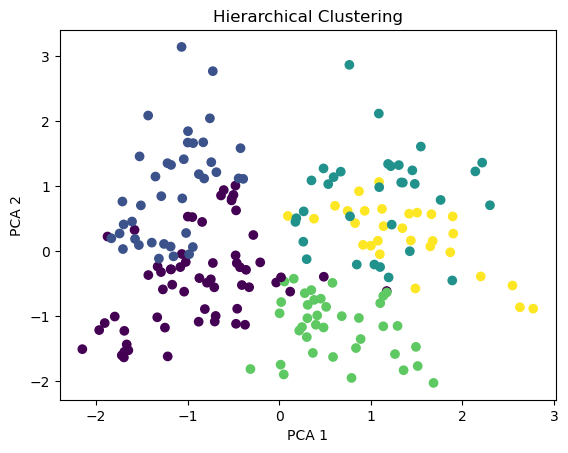

In [4]:
#Paso 1: Análisis Exploratorio de Datos (EDA)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Cargar los datos
df = pd.read_csv('Mall_Customers.csv')
df.head()

# Información general
df.info()

# Estadísticas
df.describe()

# Verificar duplicados o nulos
print(df.duplicated().sum())
print(df.isnull().sum())

# Gráficas exploratorias
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

# Distribución de ingresos vs puntuación de gasto
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.show()

#Paso 2: Preprocesamiento
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Codificar género
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Escalar los datos
features = ['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Paso 3: Selección de Características
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Paso 4: Entrenamiento de Modelos
from sklearn.cluster import KMeans

# Encontrar número óptimo de clusters (usando Elbow)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

# Entrenar modelo con número óptimo (por ejemplo 5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Dendrograma
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

# Agrupamiento jerárquico
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clusters_hc = hc.fit_predict(X_scaled)

#Paso 5: Evaluación
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# KMeans
print("KMeans - Silhouette:", silhouette_score(X_scaled, clusters_kmeans))
print("KMeans - Calinski-Harabasz:", calinski_harabasz_score(X_scaled, clusters_kmeans))

# Hierarchical
print("Hierarchical - Silhouette:", silhouette_score(X_scaled, clusters_hc))
print("Hierarchical - Calinski-Harabasz:", calinski_harabasz_score(X_scaled, clusters_hc))

#Paso 6: Visualización
# KMeans
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_kmeans, cmap='rainbow')
plt.title('K-Means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Hierarchical
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_hc, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()
